# <p align="center">Siniestros viales</p>

# <p align="center">Proceso de EDA (Exploratory Data Analysis)</p>

### Importar librerias necesarias

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd

### Leer el Dataset 'siniestros_limpio.csv'

In [100]:
# Cargar el conjunto de datos
df = pd.read_csv('Datasets/siniestros_limpio.csv')
# Mostrar las primeras filas del conjunto de datos
df.head()

,Id,Fecha,Año,Mes,Día,Día semana,Hora completa,Hora,Num víctimas,Participantes,...,Calle,Cruce,Dirección normalizada,Comuna,Barrios,Xy (caba),Coordenada x,Coordenada y,Pos x,Pos y
0,2016-0001,2016-01-01,2016.0,1.0,1.0,Viernes,04:00:00,4.0,1,MOTO-AUTO,...,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",Comuna 8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,Point (98896.78238426 93532.43437792),98896.782384,93532.434378,-58.475340,-34.687570
1,2016-0002,2016-01-02,2016.0,1.0,2.0,Sabado,01:15:00,1.0,1,AUTO-PASAJEROS,...,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",Comuna 9,LINIERS - MATADEROS - PARQUE AVELLANEDA,Point (95832.05571093 95505.41641999),95832.055711,95505.416420,-58.508775,-34.669777
2,2016-0003,2016-01-03,2016.0,1.0,3.0,Domingo,07:00:00,7.0,1,MOTO-AUTO,...,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,Comuna 1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,Point (106684.29090040 99706.57687843),106684.290900,99706.576878,-58.390403,-34.631894
3,2016-0004,2016-01-10,2016.0,1.0,10.0,Domingo,00:00:00,0.0,1,MOTO-SD,...,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",Comuna 8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,Point (99840.65224780 94269.16534422),99840.652248,94269.165344,-58.465039,-34.680930
4,2016-0005,2016-01-21,2016.0,1.0,21.0,Jueves,05:20:00,5.0,1,MOTO-PASAJEROS,...,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",Comuna 1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,Point (106980.32827929 100752.16915795),106980.328279,100752.169158,-58.387183,-34.622466


Desplegar informacion acerca del DataFrame 'df' 

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Fecha                  702 non-null    object 
 2   Año                    702 non-null    float64
 3   Mes                    702 non-null    float64
 4   Día                    702 non-null    float64
 5   Día semana             702 non-null    object 
 6   Hora completa          702 non-null    object 
 7   Hora                   701 non-null    float64
 8   Num víctimas           717 non-null    int64  
 9   Participantes          702 non-null    object 
 10  Rol                    717 non-null    object 
 11  Acusado                702 non-null    object 
 12  Victima                702 non-null    object 
 13  Sexo                   717 non-null    object 
 14  Edad                   717 non-null    int64  
 15  Rango 

Buscar valores atipicos y eliminarlos de ser necesario 

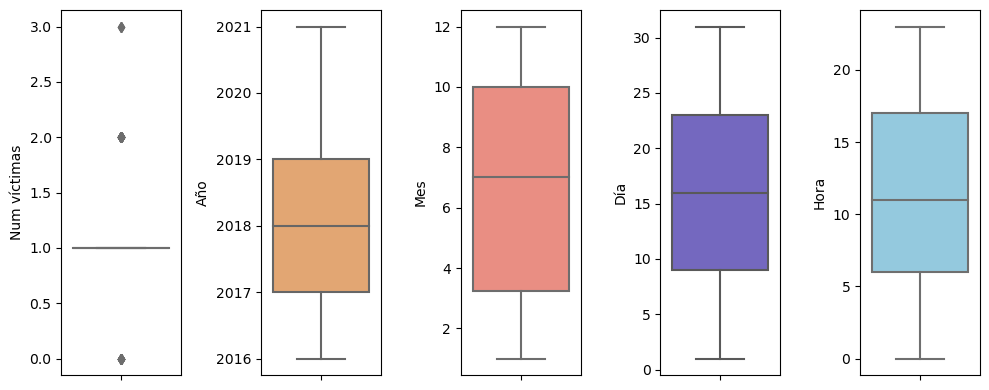

In [102]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear una lista de colores
colores = ['#FA8072', '#F4A460', '#FA8072', '#6A5ACD', '#87CEEB']

# Crear una lista de etiquetas
etiquetas = ['Num víctimas', 'Año', 'Mes', 'Día', 'Hora']

# Crear los subplots para los gráficos 
for i in range(5):
    plt.subplot(1, 5, i+1) 
    sns.boxplot(data=df, y=etiquetas[i], color = colores[i])
    plt.ylabel(etiquetas[i])
    
# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()


### Conclusión
Los valores atípicos(Outliers) en la columna 'Num víctimas'(número de víctimas), 
que son 2 o 3, ocurren porque la mayoría de las veces el registro tiene el valor de 1. Esto se refiere a la cantidad de víctimas en incidentes, y los casos donde hay 2 o 3 víctimas son excepciones en comparación con la norma, donde la mayoría de los incidentes tienen solo una víctima.

A - Variables Númericas

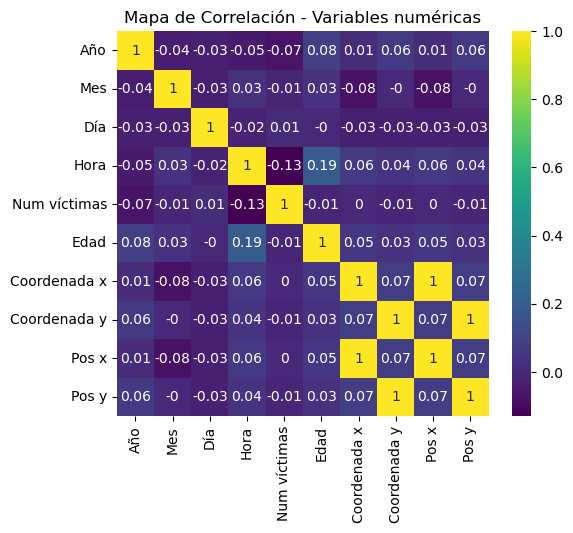

In [103]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

Al examinar todas las variables numéricas en la matriz, se evidencian conexiones sólidas y positivas entre las características Coordenada y Pos, lo cual era previsible. Además, se puede notar una relación positiva ligera entre las variables Edad y Hora. Las demás asociaciones muestran correlaciones negativas, como era de esperar, ya que la cantidad de víctimas en un incidente no está directamente relacionada con una fecha o hora específica.

## Num víctimas
Numero de víctimas por siniestro vial

In [104]:
df["Num víctimas"].describe()

count    717.000000
mean       1.037657
std        0.294226
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Num víctimas, dtype: float64

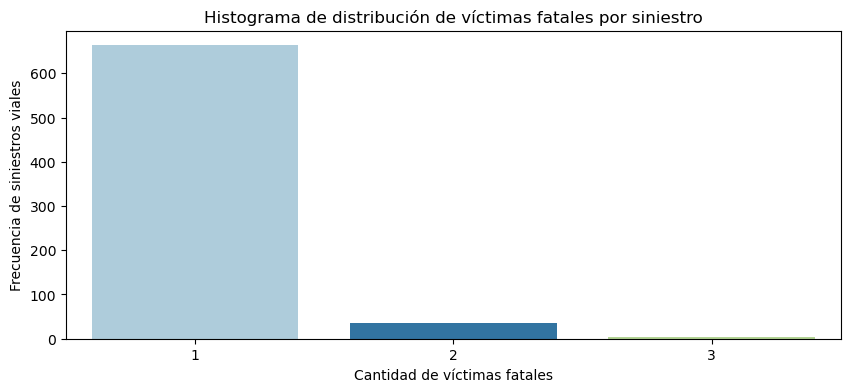

In [105]:
plt.figure(figsize=(10, 4))
# Filtrar los valores sin datos o nulos 
df_filtrado = df[df["Num víctimas"] != 0]

# Contar los datos de la columna y calcular la frecuencia en que se distribuye
sns.countplot(df_filtrado, x='Num víctimas', palette="Paired")

plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")
plt.show()

### Conclusión

En la mayoría de los casos de siniestros viales, se registra una única víctima fatal, como indica la información estadística de la columna, donde el 75% de los incidentes reportan un solo fallecimiento. Es poco común encontrar siniestros con tres víctimas fatales.

### Relación 'Num vìctimas' con el tiempo - Distribución temporal

Analizar los datos teniendo en cuenta diferentes horizontes temporales, para corroborar la existencia de algún tipo de evento o patrón importante.

In [106]:
# Agrupar por año y mes, y sumar el número de víctimas
rel_tiempo = df.groupby(['Año', 'Mes'])['Num víctimas'].sum().reset_index()

In [107]:
rel_tiempo

,Año,Mes,Num víctimas
0,2016.0,1.0,8
1,2016.0,2.0,12
2,2016.0,3.0,15
3,2016.0,4.0,9
4,2016.0,5.0,7
...,...,...,...
67,2021.0,8.0,9
68,2021.0,9.0,4
69,2021.0,10.0,5
70,2021.0,11.0,8


Rransformar los datos a tipo int para la realización del gráfico 

In [108]:
rel_tiempo["Año"]= rel_tiempo["Año"].astype("Int64")
rel_tiempo["Mes"]= rel_tiempo["Mes"].astype("Int64")

In [109]:
rel_tiempo

,Año,Mes,Num víctimas
0,2016,1,8
1,2016,2,12
2,2016,3,15
3,2016,4,9
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


In [110]:
# Combinar 'Año' y 'Mes' para obtener una sola variable de tiempo y convertirla a datetime
rel_tiempo["Fecha"] = pd.to_datetime(rel_tiempo["Año"].astype(str) + '-' + rel_tiempo["Mes"].astype(str))

# Ordenar el DataFrame por fecha para que tenga orden cronológico
rel_tiempo = rel_tiempo.sort_values("Fecha")


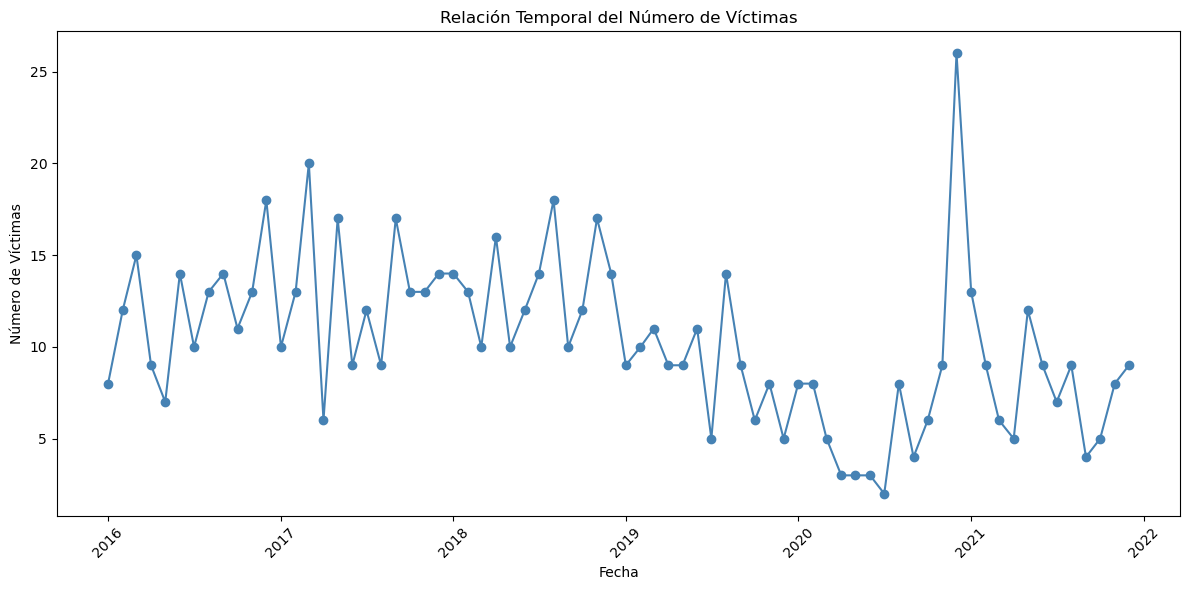

In [111]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(rel_tiempo["Fecha"], rel_tiempo["Num víctimas"], marker='o', color='steelblue')

# Añadir títulos y etiquetas
plt.title('Relación Temporal del Número de Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Conclusión
El gráfico muestra que el número de víctimas de siniestros fatales fue mayor en 2017 y 2018, disminuyendo en los años siguientes. Sin embargo, hubo un pico a finales de 2020, con el mayor número de víctimas mensuales en los años analizados (26 víctimas fatales). La pandemia de COVID19 en 2020 tuvo un impacto significativo en las estadísticas de siniestros viales.

## Distribución temporal de víctimas

### Distribución mensual de víctimas fatales

Crear un gráfico de barras que muestre la cantidad de víctimas por mes y agrega etiquetas de número de víctimas en cada barra.

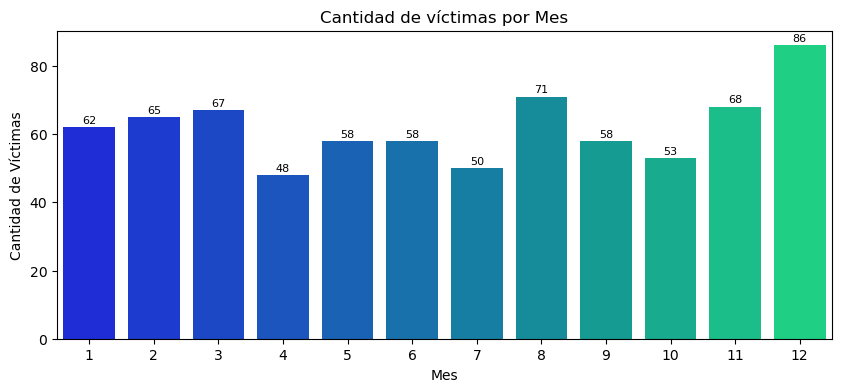

In [112]:
# Se agrupa por la cantidad de víctimas por mes
data = df.groupby(['Mes'])['Num víctimas'].sum().reset_index()
data["Mes"]=data["Mes"].astype("Int64")

# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Mes', y='Num víctimas', data=data, palette="winter")
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

### Distribución diaria de víctimas fatales

Crear un gráfico de barras que muestra la cantidad de víctimas por día y agrega etiquetas de número de víctimas en cada barra.

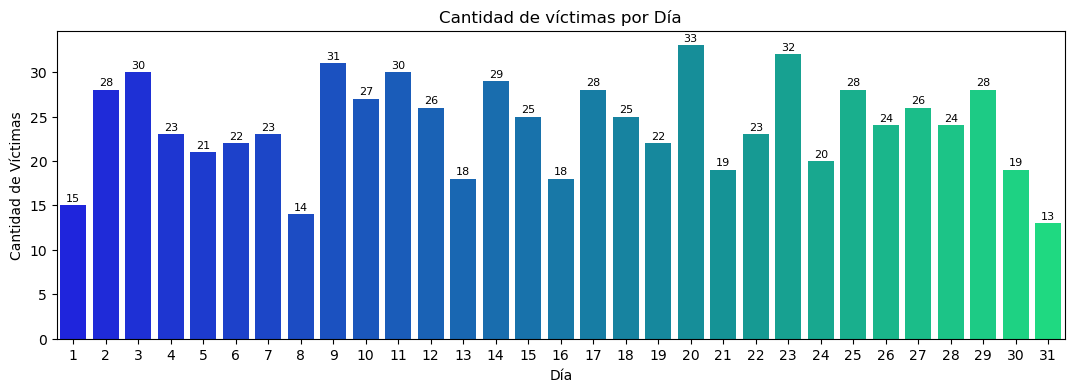

In [113]:
# Se agrupa por la cantidad de víctimas por dia
data = df.groupby(['Día'])['Num víctimas'].sum().reset_index()
data["Día"]=data["Día"].astype("Int64")

# Se grafica
plt.figure(figsize=(13,4))

ax = sns.barplot(x='Día', y='Num víctimas', data=data, palette="winter")
ax.set_title('Cantidad de víctimas por Día')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Crear un gráfico de barras que muestra la cantidad de víctimas por día de la semana y agrega etiquetas de número de víctimas en cada barra.

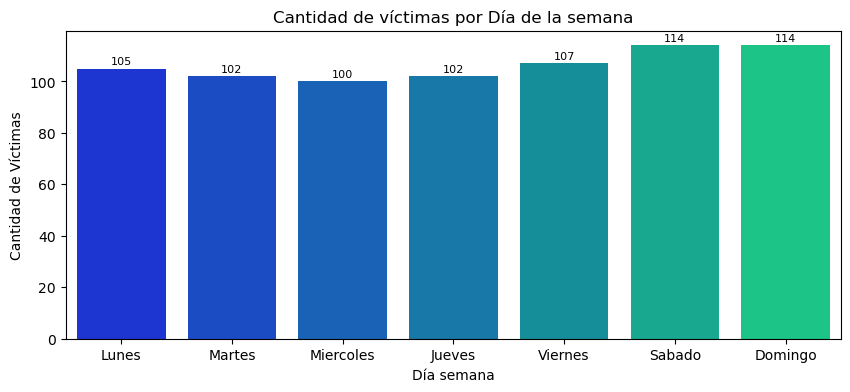

In [114]:
# Se agrupa por la cantidad de víctimas por dia semana
data = df.groupby(['Día semana'])['Num víctimas'].sum().reset_index()


# Define el orden de los días de la semana
orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Crea una columna 'Orden_dia_semana' en el DataFrame para representar el orden numérico de los días de la semana
data['Orden_dia_semana'] = data['Día semana'].apply(lambda x: orden_dias_semana.index(x))

# Ordena el DataFrame según el orden numérico de los días de la semana
data = data.sort_values(by='Orden_dia_semana')



# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Día semana', y='Num víctimas', data=data, palette="winter")
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día semana') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

### Distribución relacionando horas y días, de víctimas fatales

Crear un mapa de calor donde el eje x representa las horas del día, el eje y representa los días de la semana y el color de cada celda indica el número de víctimas. Se utiliza Seaborn para crear el mapa de calor y el argumento 'annot=True' agrega los valores numéricos en las celdas del mapa de calor.

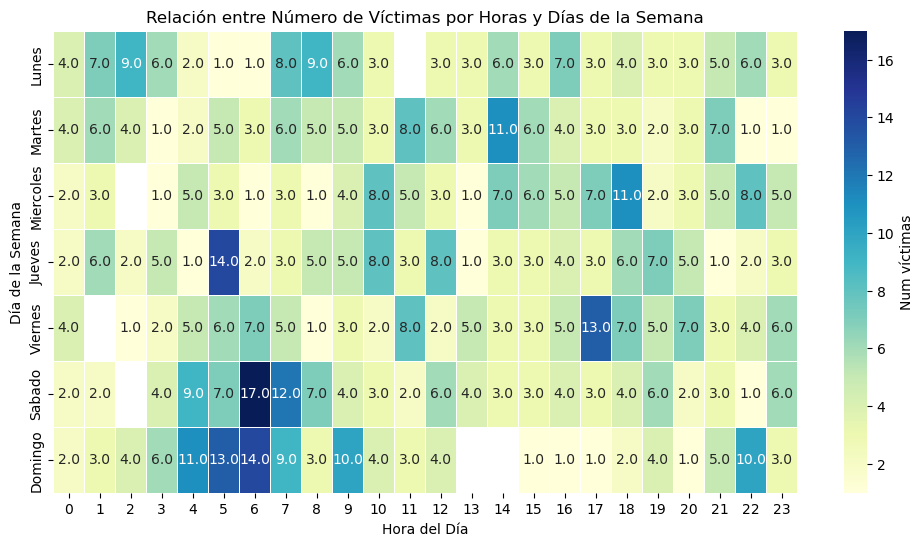

In [115]:
# Agrupar los datos en cantidad de víctimas por día de la semana y horas
data = df.groupby(['Día semana', 'Hora'])['Num víctimas'].sum().reset_index()
data["Hora"] = data["Hora"].astype("Int64")

# Usar cat.codes para asignar el orden numérico de los días de la semana
data['Orden_dia_semana'] = data['Día semana'].astype('category').cat.codes

# Crear una tabla pivot para los datos
pivot_data = data.pivot(index='Día semana', columns='Hora', values='Num víctimas').reindex(orden_dias_semana)

# Reordenar las filas del DataFrame para que coincidan con el orden deseado
pivot_data = pivot_data.loc[orden_dias_semana]

# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Num víctimas'})

# Configurar etiquetas y título
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas por Horas y Días de la Semana')

# Mostrar el gráfico
plt.show()

### Conclusión 

El mes de diciembre registra la mayor cantidad de 'víctimas fatales', alcanzando un total de 86. Dentro de cada mes, el día 20 destaca como el que presenta el mayor número de víctimas, y los fines de semana, especialmente los sábados y domingos, acumulan la cifra más alta, alcanzando las 114 víctimas fatales en conjunto. El análisis del mapa de calor revela que los días de fin de semana, especialmente los sábados y domingos, muestran un aumento en el número de víctimas fatales, especialmente durante las horas comprendidas entre las 03:00 y las 09:00.

Los momentos del día con mayor riesgo se relacionan principalmente con el inicio laboral (de 05:00 a 09:00), el mediodía (de 12:00 a 14:00) y la salida del trabajo (de 17:00 a 18:00). Se registra una baja incidencia de incidentes durante la madrugada, mientras que los fines de semana muestran una menor cantidad de eventos, pero con un mayor número de víctimas involucradas.

## Edad de las víctimas

Crear un histograma de edades de las víctimas fatales y utilizar el mismo eje para mostrar las estadísticas de la columna edades a través de un boxplot

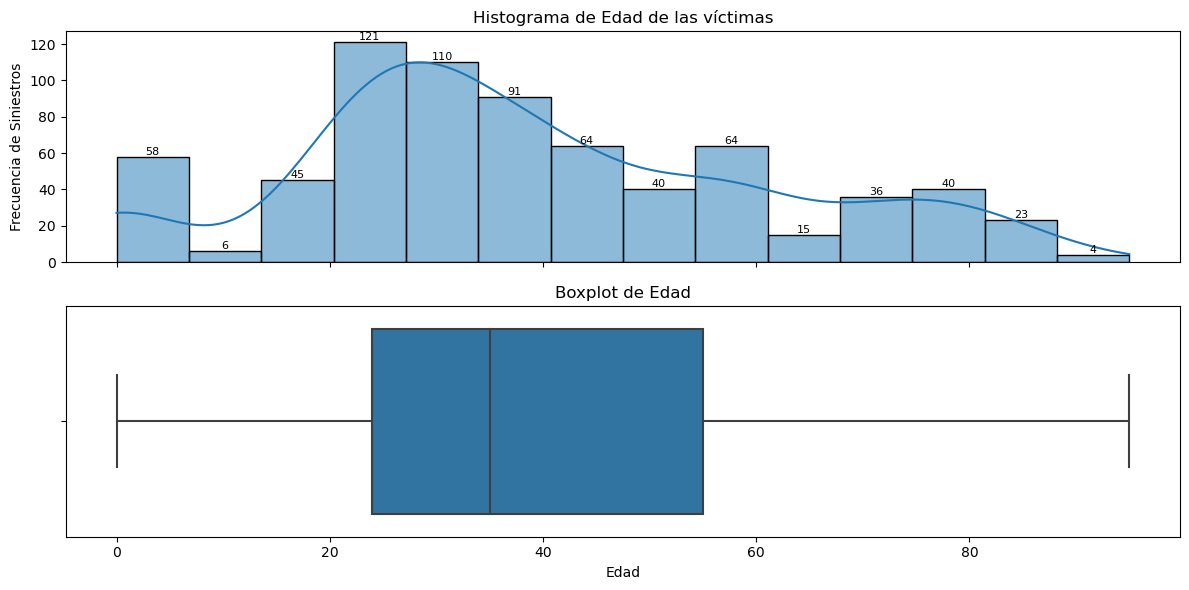

In [116]:
# Se crea una figura con un solo eje x compartido para tener dos gráficos en uno
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Se grafica el histograma de la edad
sns.histplot(df['Edad'], kde=True, ax=ax[0]) #se agrega la línea de suavizado
ax[0].set_title('Histograma de Edad de las víctimas') ; ax[0].set_ylabel('Frecuencia de Siniestros')

# Agregar etiquetas de datos en el histograma
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

# Se grafica el boxplot de la edad
sns.boxplot(x=df['Edad'], ax=ax[1])
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('Edad')

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()

In [117]:
df["Edad"].describe()

count    717.000000
mean      39.050209
std       22.010669
min        0.000000
25%       24.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

En términos generales, al analizar una representación gráfica, se nota que el 75% de las personas que perdieron la vida tienen menos de 55 años, y la edad mediana de las víctimas es de 39 años. Al observar la distribución en forma de histograma, se puede deducir que la mayoría de las víctimas fatales se encuentran en el rango de edades entre 20 y 40 años.

### Relación de Edad de las víctimas con la Hora del siniestro

Se examinó la correlación entre las variables numéricas, destacando una conexión positiva según la matriz de correlación. Para visualizar esta relación, se generó un gráfico de dispersión que ilustra la conexión entre la edad de las víctimas (en el eje x) y la hora del incidente (en el eje y).

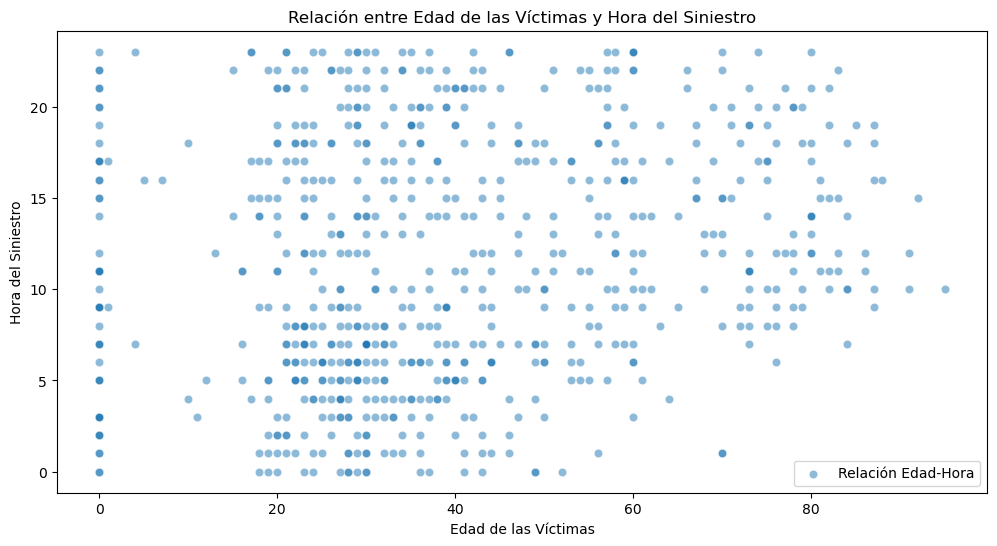

In [118]:
#Agrupa los datos en cantidad de victimas por edad y horas 
data = df.groupby(['Edad', "Hora"])['Num víctimas'].sum().reset_index()
data["Edad"]=data["Edad"].astype("Int64")
data["Hora"]=data["Hora"].astype("Int64")



# Crear un gráfico de dispersión para la relación entre edad y hora
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='Edad', y='Hora', alpha=0.5, label='Relación Edad-Hora') # se utiliza alpha para transparencia de los puntos
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Hora del Siniestro')
plt.title('Relación entre Edad de las Víctimas y Hora del Siniestro')

# Agregar una leyenda
plt.legend(loc='best') 
# Mostrar el gráfico
plt.show()

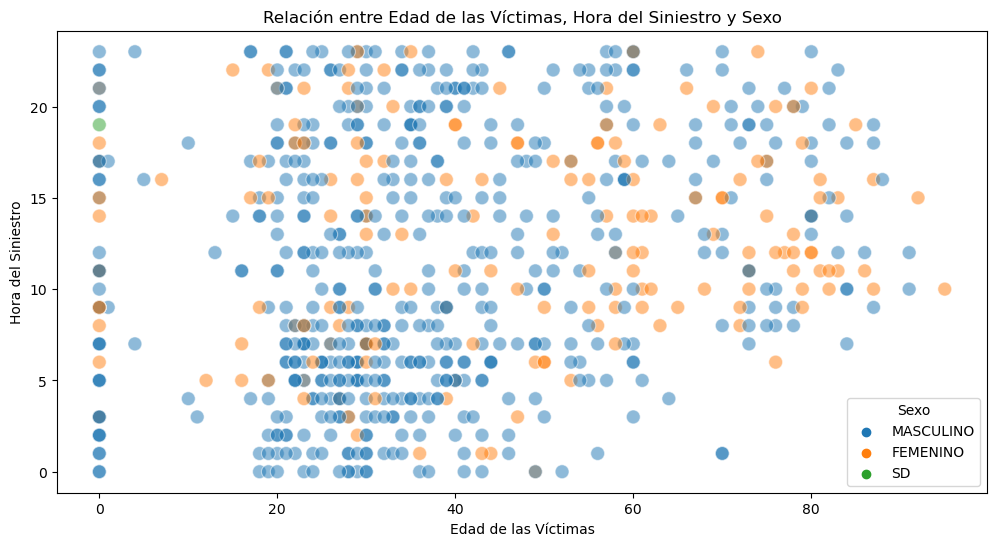

In [119]:
#Agrupa los datos en cantidad de victimas por edad y horas 
data = df.groupby(['Edad', "Hora", "Sexo"])['Num víctimas'].sum().reset_index()
data["Edad"]=data["Edad"].astype("Int64")
data["Hora"]=data["Hora"].astype("Int64")

# Crear un gráfico de dispersión para la relación entre edad, hora y sexo
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Edad', y='Hora', hue='Sexo', alpha=0.5, palette='tab10', s=100)

# Agregar etiquetas a los ejes
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Hora del Siniestro')
plt.title('Relación entre Edad de las Víctimas, Hora del Siniestro y Sexo')

# Agregar una leyenda
plt.legend(title='Sexo')

# Mostrar el gráfico
plt.show()

### Conclusión 

Las gráficas de dispersión analizadas revelan la correlación entre las edades de las víctimas de 20 a 40 años y las horas de mayor incidencia de accidentes de tráfico, específicamente entre las 5 a 9 de la mañana y de 5 a 6 de la tarde. Además, al incorporar la distinción por género, se observa que hay más víctimas masculinas en comparación con las femeninas en esta relación.

## Distribución etaria de víctimas según Sexo

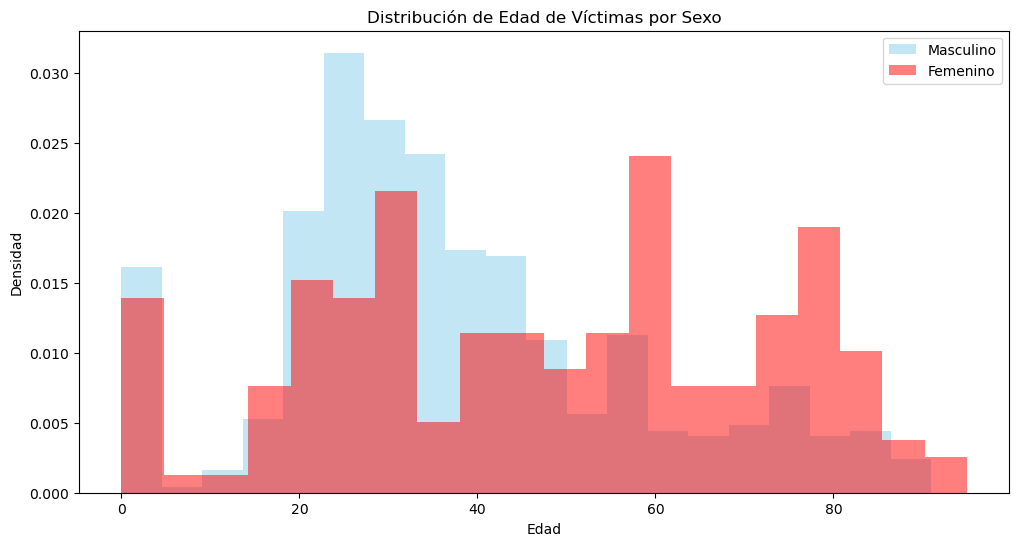

In [120]:
# Filtrar por sexo masculino
masculino = df[df['Sexo'] == 'MASCULINO']['Edad'].dropna()

# Filtrar por sexo femenino
femenino = df[df['Sexo'] == 'FEMENINO']['Edad'].dropna()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(masculino, bins=20, alpha=0.5, color='skyblue', label='Masculino', density=True)
plt.hist(femenino, bins=20, alpha=0.5, color='red', label='Femenino', density=True)
plt.title('Distribución de Edad de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

### Conclusión
El gráfico presenta dos histogramas en un mismo eje para facilitar la comparación visual de las edades de las víctimas de ambos sexos. Los datos revelan que las víctimas masculinas tienden a tener edades comprendidas entre 20 y 40 años, mientras que las víctimas femeninas se distribuyen en tres grupos principales, concentrándose en las edades de 40, 60 y 80 años.

## Distribución temporal de las Edades de las víctimas

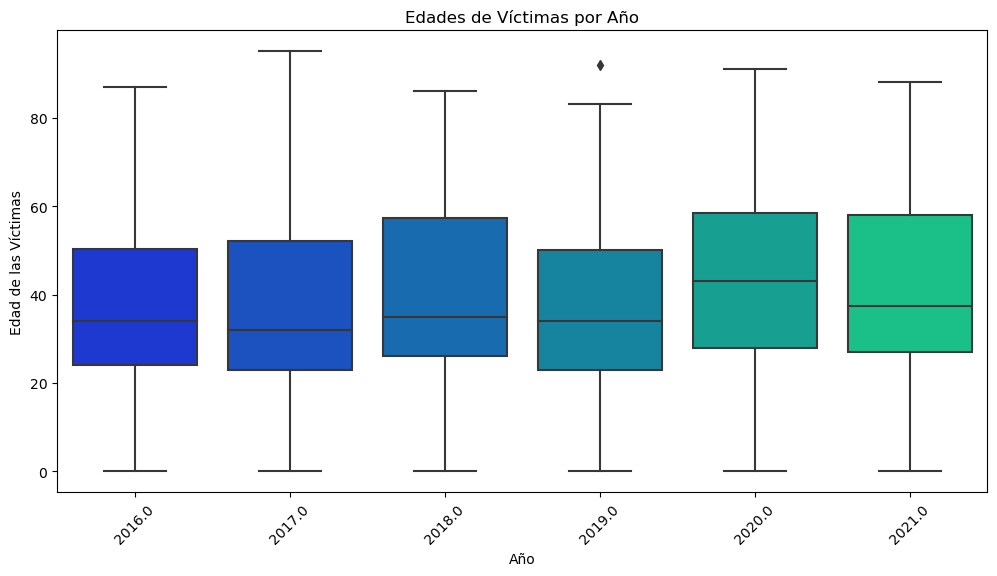

In [121]:
# Agrupar los datos en cantidad de victimas por edad y  año
data = df.groupby(['Edad', "Año"])['Num víctimas'].sum().reset_index()


# Crear el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Edad', data=df, palette="winter")

plt.title('Edades de Víctimas por Año') ; plt.xlabel('Año') ; plt.ylabel('Edad de las Víctimas')
# Cambiar el formato de las etiquetas del eje x a enteros
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

### Conclusión
El gráfico confirma que la mediana de la edad de las víctimas ha permanecido alrededor de los 39 años a lo largo del tiempo, y supera esta cifra en el año 2020.

## Distribución espacial de los siniestros con víctimas Coordenadas
En Geopandas, se comienza estableciendo un sistema de referencia de coordenadas (CRS), que indica a Python cómo se vinculan las coordenadas que definimos con distintos lugares en el planeta.

In [122]:
# Iniciaor CRS
crs={'init':'epsg:4326'}

In [123]:
# Definir la geometría según nuestro dataset
geometry=[Point(xy) for xy in zip(df["Pos x"], df["Pos y"])]

c:\Users\Usuario\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

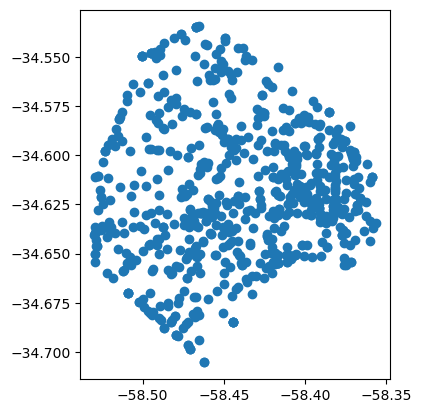

In [124]:
# Al tener el sistema de referencia decoordenadas y la geometría; se procede a la carga de los datos
geodata=gpd.GeoDataFrame(df,crs=crs, geometry=geometry)

# Imprimir el resultante que luego será introducido en un mapa
geodata.plot()

Una vez que el mapa de geometría está listo, se debe cargar el archivo de las comunas de la ciudad de Buenos Aires que se extrajo de https://data.buenosaires.gob.ar/dataset/comunas/resource/Juqdkmgo-612222-resource que debe ser un archivo Shapefile (SHP)

In [125]:
# Extraer el archivo
shapefile = gpd.read_file(r"comunas/comunas_wgs84.shp")

Text(158.48305973900304, 0.5, 'Latitud')

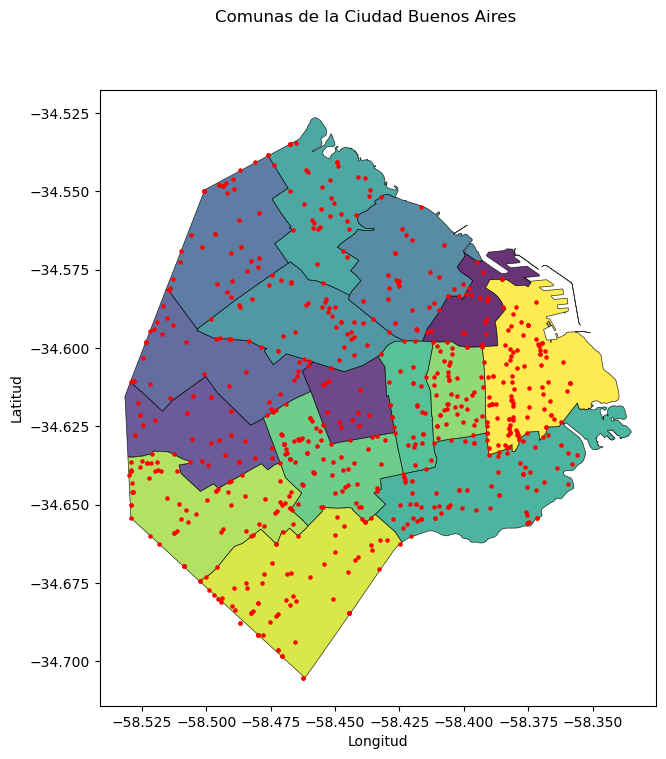

In [126]:
# Realizar sobre el mapa de CABA la presentación de los puntos de referencia a los siniestros viales

# Crear ejes y figuras
fig, ax = plt.subplots(figsize=(10,8))

# Dibujar el Shapefile
shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=0.8,linewidth=0.5,cmap="viridis")

# Dibujar los datos geoespaciales
geodata.plot(ax=ax, color='red', markersize=5);

# Agregar título y etiquetas de ejes
fig.suptitle('Comunas de la Ciudad Buenos Aires', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium')

### Conclusión
La gráfica indica la concentración de puntos rojos que representan accidentes con víctimas fatales en la zona Este del mapa de la Ciudad Autónoma de Buenos Aires, específicamente en las comunas 1 y 4.

## B - Variables Categóricas

## Distribución por Comuna

In [127]:
# Crear un DataFram con el número de víctimas por Barrio y Comuna
Total_comuna=df.groupby(["Comuna", "Barrios"])["Num víctimas"].sum().reset_index()
Total_comuna=Total_comuna.sort_values(by="Num víctimas", ascending=False)
Total_comuna

,Comuna,Barrios,Num víctimas
0,Comuna 1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,101
9,Comuna 4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,81
14,Comuna 9,LINIERS - MATADEROS - PARQUE AVELLANEDA,74
13,Comuna 8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,70
12,Comuna 7,FLORES - PARQUE CHACABUCO,65
8,Comuna 3,BALVANERA - SAN CRISTOBAL,48
6,Comuna 15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,47
3,Comuna 12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,43
4,Comuna 13,BELGRANO - COLEGIALES - NUÃ‘EZ,39
5,Comuna 14,PALERMO,38


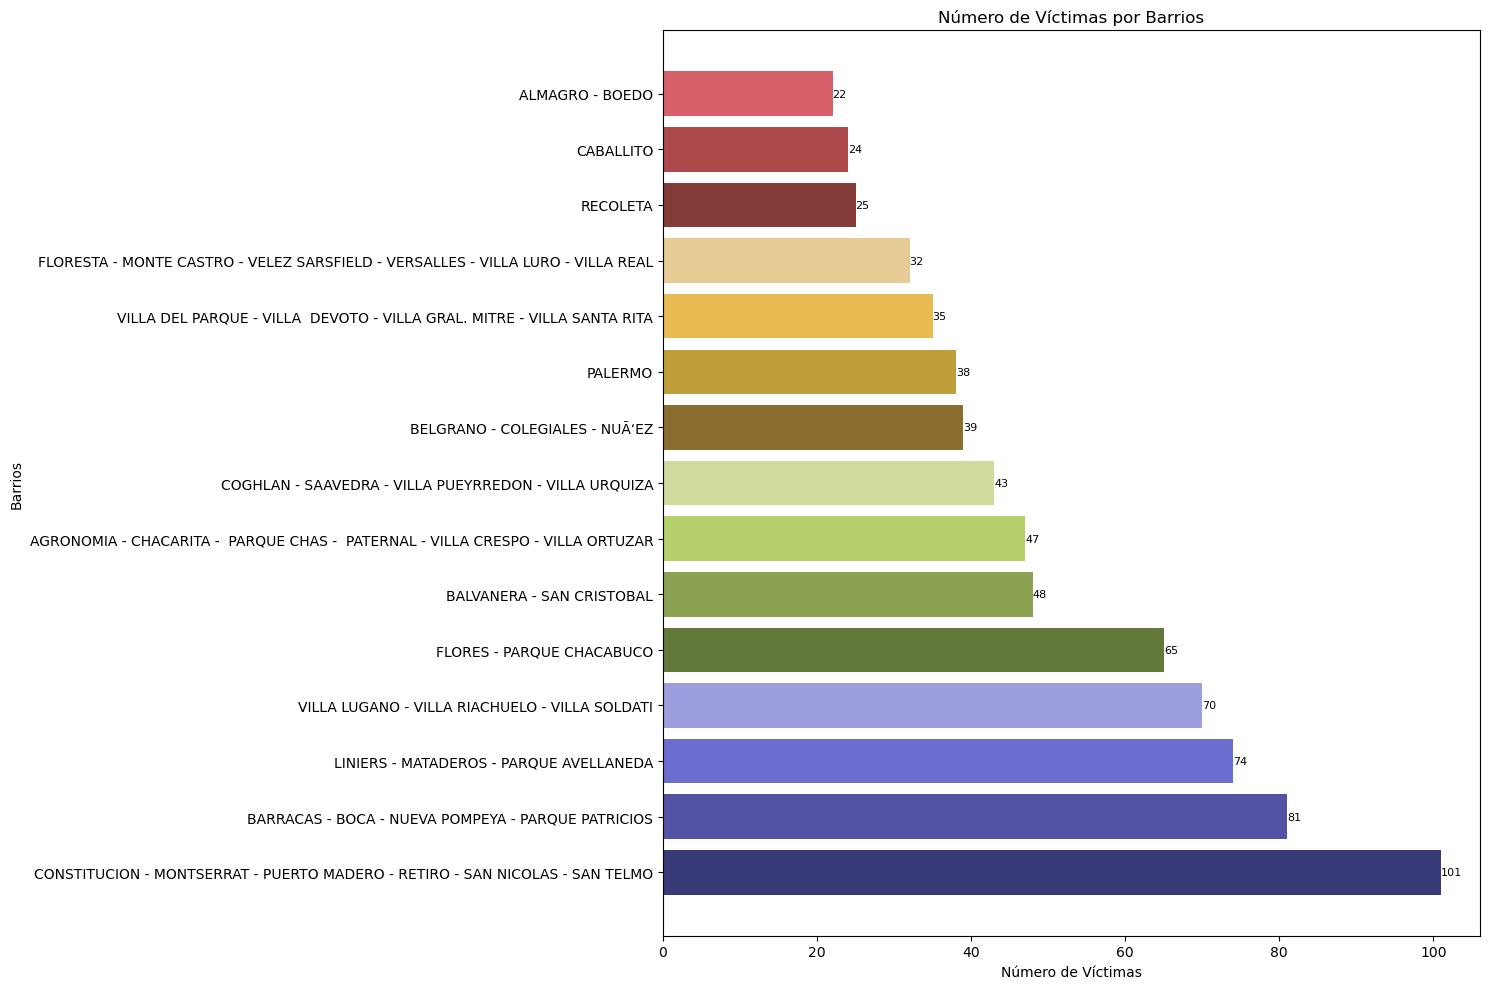

In [128]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(15, 10))

# Definir colores para las barras
colores = plt.cm.tab20b(range(len(Total_comuna)))

# Dibujar las barras horizontales
plt.barh(Total_comuna["Barrios"], Total_comuna["Num víctimas"], color=colores)

# Etiquetar eje x e y
plt.xlabel('Número de Víctimas')
plt.ylabel('Barrios')

# Titular el gráfico
plt.title('Número de Víctimas por Barrios')

# Agregar el número de víctimas sobre cada barra
for i, v in enumerate(Total_comuna["Num víctimas"]):
    plt.text(v, i, str(v), va='center', fontsize=8, color='black')


plt.tight_layout()
plt.show()

### Conclusión
El dataset muestra 15 comunas que constituyen los barrios de CABA. Cada comuna incluye uno o varios barrios. Según la tabla Total_comunas, las Comunas 1, 4, 9, 8 y 7 registran el mayor número de víctimas fatales. La Comuna 1 tiene 20 víctimas más que la Comuna 4, que le sigue en la lista.

Esto indica que podrían ser vecindarios donde hay calles muy concurridas durante las horas de inicio o finalización de la jornada laboral.

## Distribución de los Tipos de Calles donde suceden los siniestros

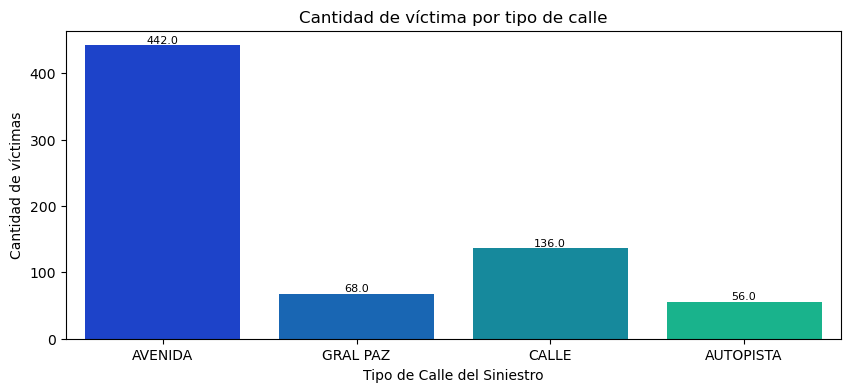

In [129]:
# Ccrea el gráfico de barras
plt.figure(figsize=(10, 4))

ax=sns.countplot(df, x='Tipo de calle', palette="winter")

# Agregar el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Titular los ejes
plt.xlabel('Tipo de Calle del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctima por tipo de calle')

plt.show()

### Conclusión
Del análisis del gráfico resulta que el mayor número de víctimas fatales se producen en Avenida; secundado por Calle.

## Distribución de Participantes en los siniestros

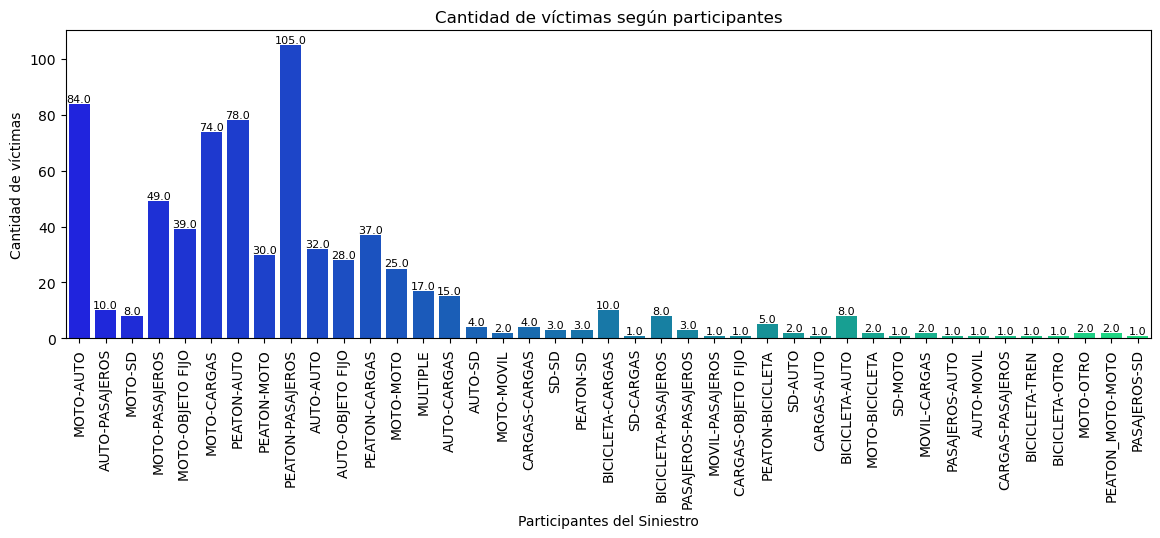

In [130]:
# Crear el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Participantes", palette="winter")

# Agregar el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Ubicar los titulos de las barras en 90 grados
plt.xticks(rotation=90)

# Titular los ejes
plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

plt.show()

### Conclusión
Los valores de participación que concentran más víctimas están en PEATON-PASAJEROS, esto según el diccionario de datos, se refiere a Peatón: es cualquier víctima distinta de cualquier ocupante de un vehículo; Pasajero: es cualquier persona que se encuentra dentro, descendiendo o ascendiendo del transporte público u omnibús de larga distancia.
Le siguen en importancia de víctimas MOTO-AUTO , PEATON-AUTO y MOTO-CARGAS

En la columna Participantes puede interpretarse que la primer palabra se relaciona a quien fue la Víctima y la segunda palabra se refiere al Acusado

## Distribución de Acusados en los siniestros

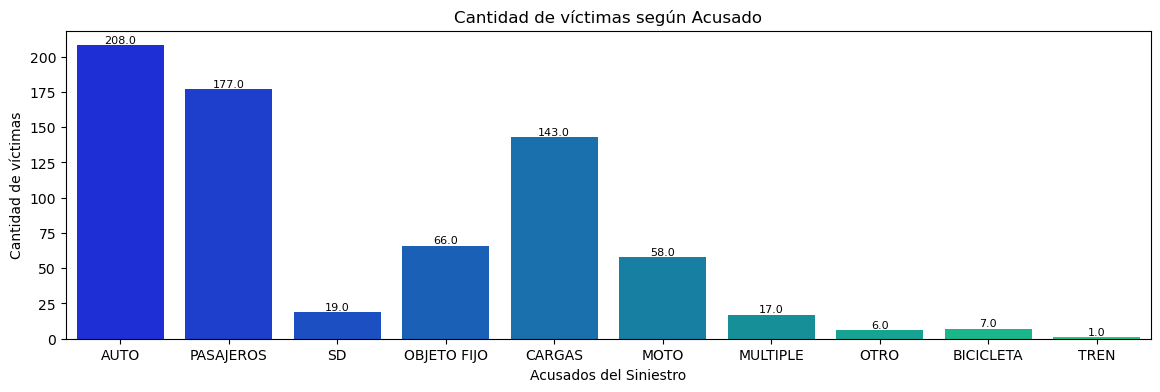

In [131]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Acusado", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

### Conclusión
Se puede visualizar que los que causan más víctimas son los Autos, Cargas y Pasajeros. Esto se relaciona con el punto anterior.

## Distribución de Víctimas en los siniestros

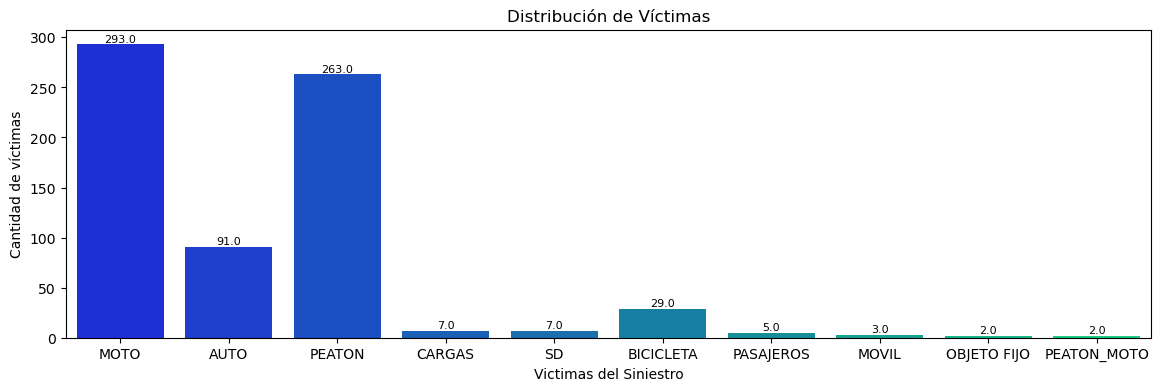

In [132]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Victima", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Victimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Distribución de Víctimas')

plt.show()

### Conclusión
Se puede visualizar que las víctimas son Moto, Peaton y Carga. Esto se relaciona con ambos puntos anteriores.

## Matriz de confusión
Se crea una tabla de contingencia que relacione los datos de las columnas Víctima y Acusado para analizar de manera más visual los datos de los siniestros y sus participantes.

In [133]:
tabla_contingencia = pd.crosstab(df['Victima'], df['Acusado'])

# Visualizar la tabla de contingencia
tabla_contingencia

Acusado,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,OBJETO FIJO,OTRO,PASAJEROS,SD,TREN
Victima,,,,,,,,,,
AUTO,32,0,15,0,3,26,1,10,4,0
BICICLETA,8,0,10,0,1,0,1,8,0,1
CARGAS,1,0,4,0,0,1,0,1,0,0
MOTO,84,2,74,25,8,39,4,49,8,0
MOVIL,0,0,2,0,0,0,0,1,0,0
OBJETO FIJO,2,0,0,0,0,0,0,0,0,0
PASAJEROS,1,0,0,0,0,0,0,3,1,0
PEATON,78,5,37,30,5,0,0,105,3,0
PEATON_MOTO,0,0,0,2,0,0,0,0,0,0


### Conclusión
En resumen, los resultados muestran claramente la intervención específica en cada tipo de siniestro. Cuando el acusado es un vehículo tipo Auto, las víctimas son principalmente Autos, Motos y Peatones. En el caso de acusados tipo Cargas, las víctimas son diversas, con Motos y Peatones siendo los más comunes. Cuando los acusados son Pasajeros, las principales víctimas son Peatones y Motos. Se destaca que las víctimas de Motos y Peatones tienen una frecuencia alta y están relacionadas con casi todos los tipos de acusados.

## Proporción de víctimas por Sexo

Text(0.5, 1.0, 'Proporción de Víctimas por Sexo')

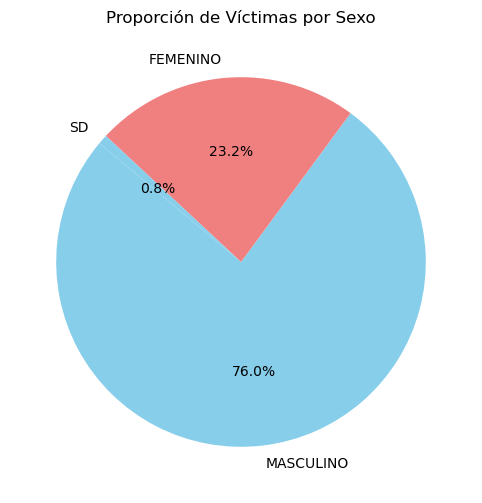

In [134]:
# Calcular la proporción de víctimas por sexo
proporcion = df['Sexo'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Víctimas por Sexo')

## Distribución de los roles de las víctimas por Sexo

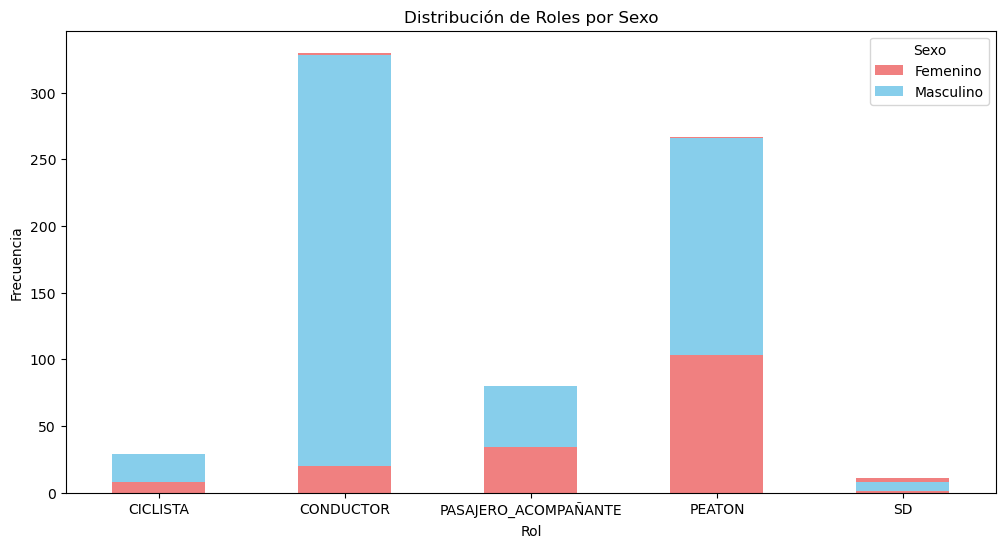

In [135]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df['Rol'], df['Sexo'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

### Conclusión
En términos de la distribución de roles de las víctimas en accidentes, se observa que la mayoría de los siniestros involucran a conductores, seguidos por peatones. Al desglosar por género, se destaca que para las víctimas masculinas, el papel más común en los accidentes es el de conductor, seguido por peatón. Por otro lado, en el caso de las víctimas femeninas, el rol más frecuente es el de peatón, seguido por pasajero-acompañante.

## Distribucíon de víctimas según sexo y tipo de vehículo

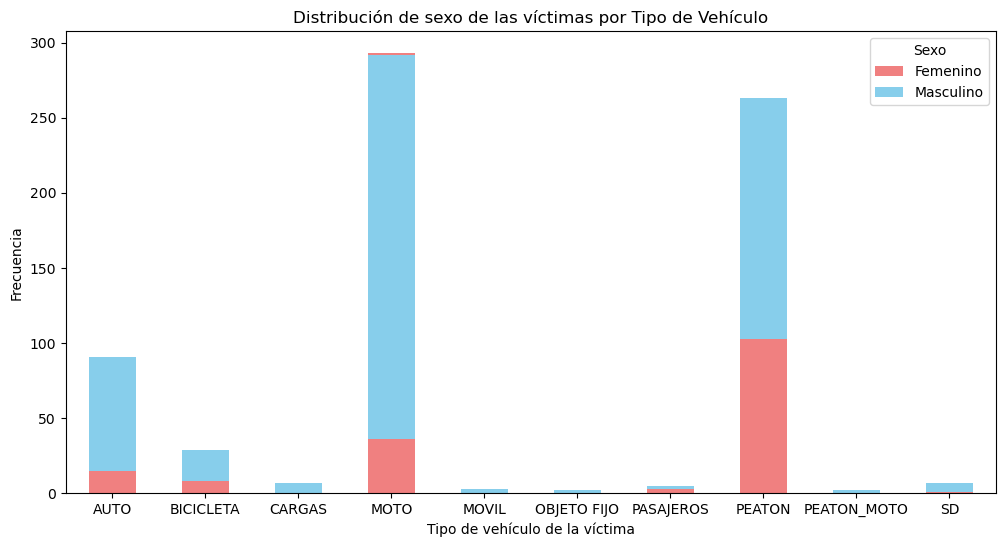

In [136]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df['Victima'], df['Sexo'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de sexo de las víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de vehículo de la víctima')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

### Conclusión
La mayor cantidad de accidentes con víctimas fatales son en Moto y además con más proporción de Masculinos
Los Peatones, son el segundo tipo de víctima, en el que la mayor proporción son Masculinos pero con menor diferencia que en la primera.